**Explotary Data Analysis and Sentiment Analysis of 120620 records of Netflix reviews added between July 2019 and December 2024**



In [ ]:
import pandas as pd
df = pd.read_csv('/content/netflix_reviews.csv')

In [ ]:
df.head()

,reviewId,userName,content,score,thumbsUpCount,reviewCreatedVersion,at,appVersion
0,2637c186-0d7d-4b79-88de-13ef61458f40,Nghĩa Chí,Terrible at all,1,0,NaN,2024-12-05 16:10:47,NaN
1,f98fd2bc-ec98-4ce3-b96a-7f836a5f3dc0,Golusingh Rajput,Bad,5,0,NaN,2024-12-05 16:09:07,NaN
2,0a2c87a9-9a5a-4876-aebd-ad7f17c5b692,Huda Abdullah,Netflix is the worst they don't respect the is...,1,0,8.140.1 build 14 51170,2024-12-05 16:06:35,8.140.1 build 14 51170
3,1a02e567-b59e-48e0-8085-464a7f99d59c,Ogbu Augustinechukwujekwu,Nice one,5,0,8.140.1 build 14 51170,2024-12-05 16:05:24,8.140.1 build 14 51170
4,1f71bddf-b2c5-48eb-ab76-d53351a3f44c,MaZazah Ngcamu,I love it because it is has a lot movies to wa...,5,0,7.120.6 build 63 35594,2024-12-05 16:01:53,7.120.6 build 63 35594


In [ ]:
df.shape

(120620, 8)

In [ ]:
df.isnull().sum()

,0
reviewId,0
userName,2
content,4
score,0
thumbsUpCount,0
reviewCreatedVersion,18488
at,0
appVersion,18488


In [ ]:
#remove duplicates
df.drop_duplicates(subset='reviewId', inplace=True)

In [ ]:
df.dtypes
df['at'] = pd.to_datetime(df['at'])

**Checking for outlies**

In [ ]:
df.score.min()
df.score.max()

5

In [ ]:
df.thumbsUpCount.max()
df.thumbsUpCount.min()


0

In [ ]:
df.describe()

,score,thumbsUpCount
count,119927.000000,119927.000000
mean,2.823576,9.908753
std,1.708638,98.388147
min,1.000000,0.000000
25%,1.000000,0.000000
50%,3.000000,0.000000
75%,5.000000,1.000000
max,5.000000,8032.000000


**Checking distribution of scores, thumbsUpCount**

<Axes: xlabel='score', ylabel='Count'>

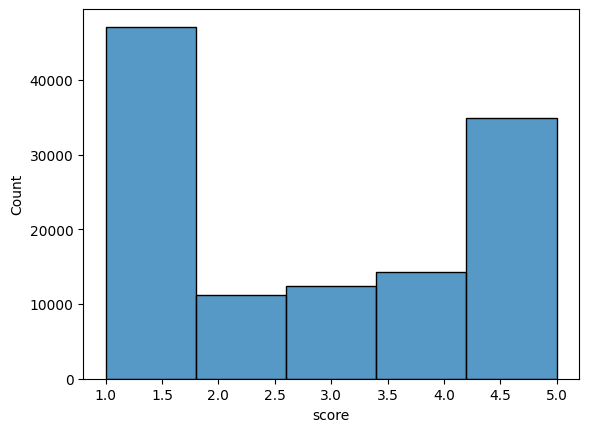

In [ ]:
import seaborn as sns
sns.histplot(df['score'], bins=5)

<Axes: >

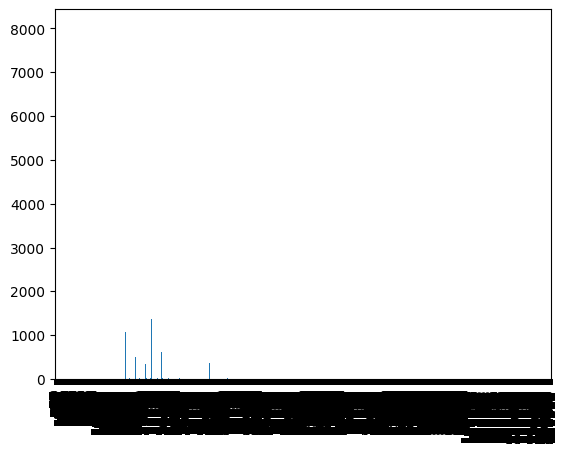

In [ ]:
df['thumbsUpCount'].plot.bar()

**Time analysis**

<Axes: xlabel='month'>

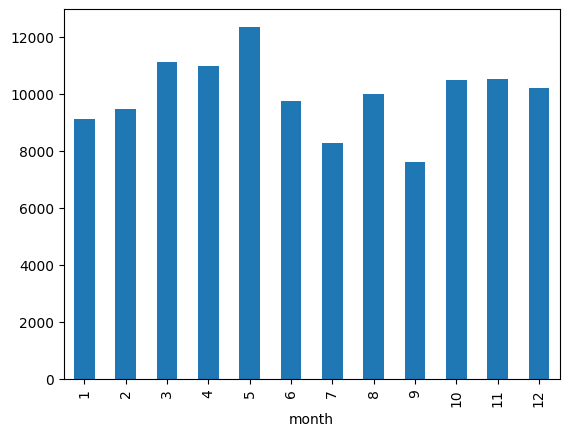

In [ ]:
#df['month'] = df['at'].dt.month
df.groupby('month').size().plot(kind='bar')

**App version analaysis**

<Axes: xlabel='appVersion'>

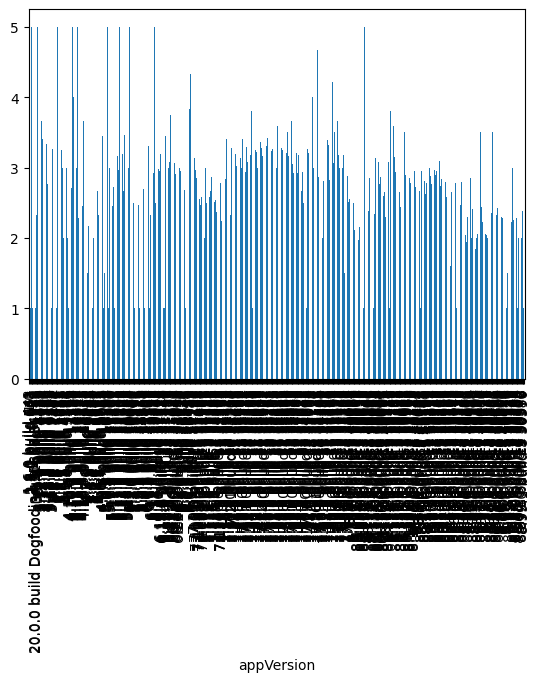

In [ ]:
df.groupby('appVersion')['score'].mean().plot(kind = 'bar')

**Categorical data analysis**

In [ ]:
#Review counts per user
df.userName.value_counts().head(10)

,count
userName,
A Google user,30194
Alex,21
J,18
Josh,18
Chris,15
Michael,14
A,14
Ryan,13
M,13


In [ ]:
#Review counts by content
df.content.value_counts().head()

,count
content,
Good,507
Nice,147
Excellent,72
Ok,60
good,58


**Score vs Thumbs Up**

<Axes: xlabel='score', ylabel='thumbsUpCount'>

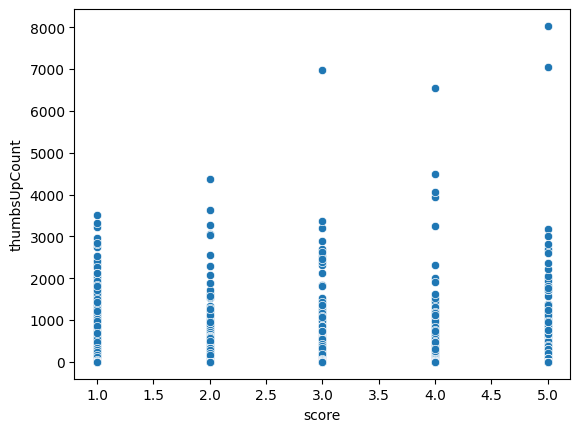

In [ ]:
sns.scatterplot(x='score', y='thumbsUpCount', data = df)

In [ ]:
active_users_by_thumbs_up = df.groupby('userName')['thumbsUpCount'].sum().reset_index().sort_values(by='thumbsUpCount', ascending=False)

active_users_by_thumbs_up.head(10)


,userName,thumbsUpCount
245,A Google user,209623
78037,bugby,6990
25310,Gifty Mittal,4502
8701,Auds Alcid,4369
58698,Rhonda V,4070
29547,J C,3940
22217,Erin Britz,3639
47246,Mike C,3530
9766,Barry Haworth,3366
52992,Olli Sivonen,3320


In [ ]:
active_users_by_reviews = df.groupby('userName')['reviewId'].count().reset_index().sort_values(by='reviewId', ascending=False).head(10)
active_users_by_reviews


,userName,reviewId
245,A Google user,30194
3516,Alex,21
29529,J,18
34448,Josh,18
14532,Chris,15
46592,Michael,14
214,A,14
60770,Ryan,13
42352,M,13
17655,David,12


**Texual data exploration**

<Axes: xlabel='content length', ylabel='Count'>

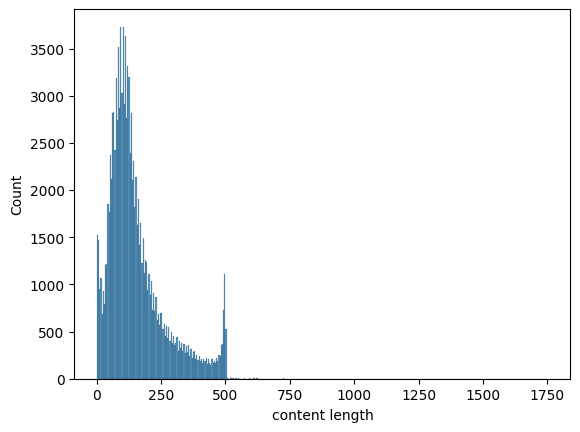

In [ ]:
#Length of reviews
df['content length'] = df['content'].apply(lambda x:len(str(x)))
sns.histplot(df['content length'])

**Word frequency**

In [ ]:
#Most common words in reviews
from wordcloud import WordCloud
wordcloud = WordCloud(width=800,height=400).generate(''.join(df['content'].dropna()))

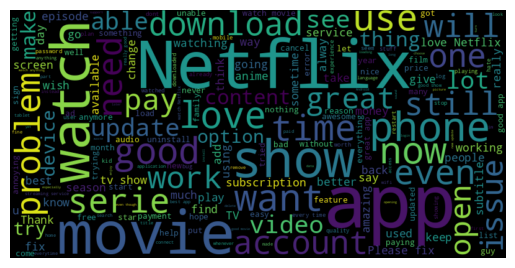

In [ ]:
import matplotlib.pyplot as plt

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

**Setiment analysis**

In [ ]:
#Text processing for sentiment analysis
#1. remove stopwrods

import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')

stop_words = set(stopwords.words('english'))

df['cleaned_content'] = df['content'].apply(lambda x: ' '.join([word for word in str(x).split() if word.lower() not in stop_words]))



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,cleaned_content
0,Terrible
1,Bad
2,Netflix worst respect islam religion understan...
3,Nice one
4,love lot movies watch 💗💗💗💗💗
...,...
120615,really like it! many movies kdramas watch
120616,love Netflix. always enjoy time using it.
120617,Sound quality slow movies
120618,"Rate expensive.. bcos see netflix sunday only,..."


In [ ]:
nltk.download('punkt_tab')



[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [ ]:
#2. tokenization

from nltk.tokenize import word_tokenize
df['tokens'] = df['cleaned_content'].apply(word_tokenize)
df.tokens

,tokens
0,[Terrible]
1,[Bad]
2,"[Netflix, worst, respect, islam, religion, und..."
3,"[Nice, one]"
4,"[love, lot, movies, watch, 💗💗💗💗💗]"
...,...
120615,"[really, like, it, !, many, movies, kdramas, w..."
120616,"[love, Netflix, ., always, enjoy, time, using,..."
120617,"[Sound, quality, slow, movies]"
120618,"[Rate, expensive, .., bcos, see, netflix, sund..."


**Sentiment analysis using VADER(Valence Aware Dictionary and sEntiment Reasoner)**

In [ ]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')

sid = SentimentIntensityAnalyzer()
df['sentiment'] = df['content'].apply(lambda x: sid.polarity_scores(str(x))['compound'])

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


In [ ]:
#Sentiment categorization (compound score from -1 to +1)
df['sentiment_category'] = df['sentiment'].apply(lambda x: 'positive' if x >0 else ('negative' if x <0 else 'neutral'))

<Axes: xlabel='sentiment', ylabel='Count'>

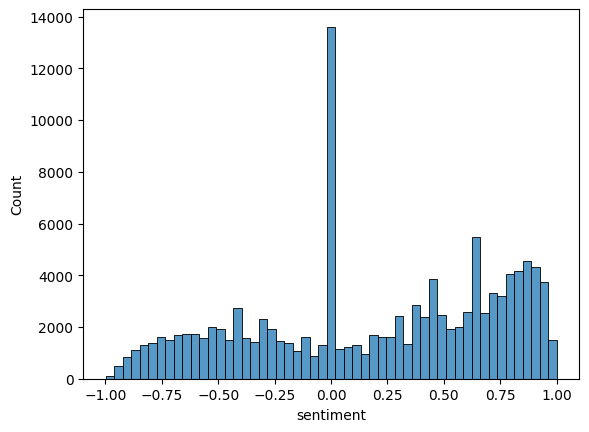

In [ ]:
#Visualizing sentiment distribution
sns.histplot(df['sentiment'])

<Axes: xlabel='sentiment_category', ylabel='score'>

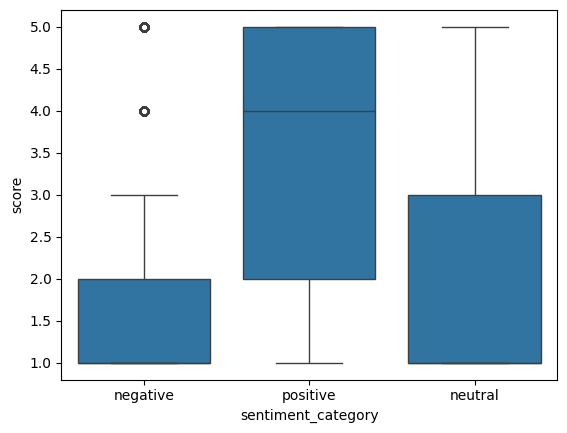

In [ ]:
#Score vs Sentiment
sns.boxplot(x='sentiment_category', y ='score', data=df)

**•	Score vs Sentiment: There is a strong correlation between the numeric score and the text sentiment (sentiment_category). a 5-star review typically have a positive sentiment.**